In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the data
# Load the data without headers
data = pd.read_csv('twitter_training.csv', header=None)

# Assign column names manually
data.columns = ['ID', 'Topic', 'Sentiment', 'Text']

# Now you can clean the 'Text' column
data['cleaned_text'] = data['Text'].str.lower().replace(r'http\S+|www.\S+', '', regex=True)

# Check the first few rows of the cleaned data
print(data.head())


     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                                        cleaned_text  
0  im getting on borderlands and i will murder yo...  
1  i am coming to the borders and i will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [13]:
# Sentiment distribution
sentiment_counts = data['Sentiment'].value_counts()
print(sentiment_counts)

print('--------------------------------------')

# Topic distribution (if you want to check for multiple topics)
topic_counts = data['Topic'].value_counts()
print(topic_counts)


Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64
------
--------------------------------------
Topic
Microsoft                            2400
MaddenNFL                            2400
TomClancysRainbowSix                 2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Overwatch                            2334
Xbox(Xseries)                        2334
johnson&johnson                      2328
Amazon                               2316
HomeDepot                         

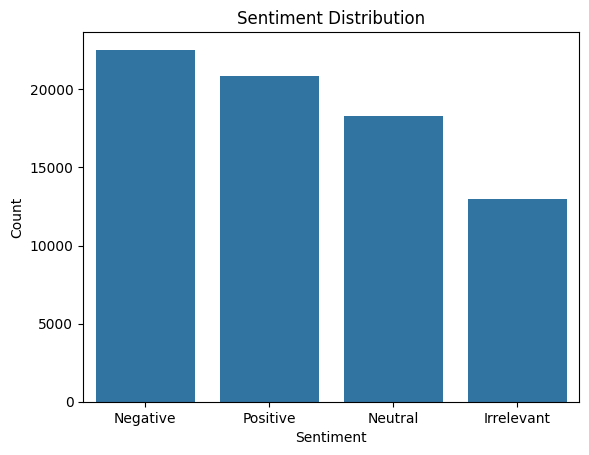

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for sentiment distribution
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.ylabel('Count')
plt.show()


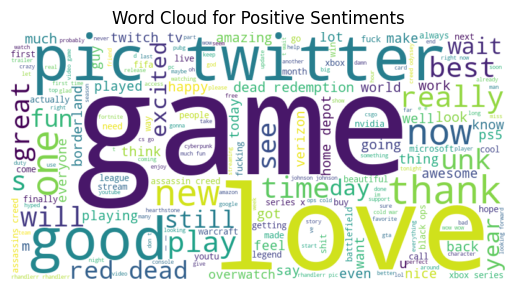

In [16]:
# Drop rows with missing values in the 'cleaned_text' column
data = data.dropna(subset=['cleaned_text'])

# Generate word cloud for positive sentiment
positive_text = ' '.join(data[data['Sentiment'] == 'Positive']['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiments')
plt.show()



Sentiment                          Irrelevant  Negative  Neutral  Positive
Topic                                                                     
Amazon                                    186       575     1207       308
ApexLegends                               192       591      936       634
AssassinsCreed                            264       375      156      1439
Battlefield                               915       464      351       586
Borderlands                               240       426      597      1017
CS-GO                                     632       344      548       760
CallOfDuty                                672       883      375       446
CallOfDutyBlackopsColdWar                 569       566      352       856
Cyberpunk2077                             465       385      462       950
Dota2                                     425       767      588       579
FIFA                                      558      1169      102       495
Facebook                 

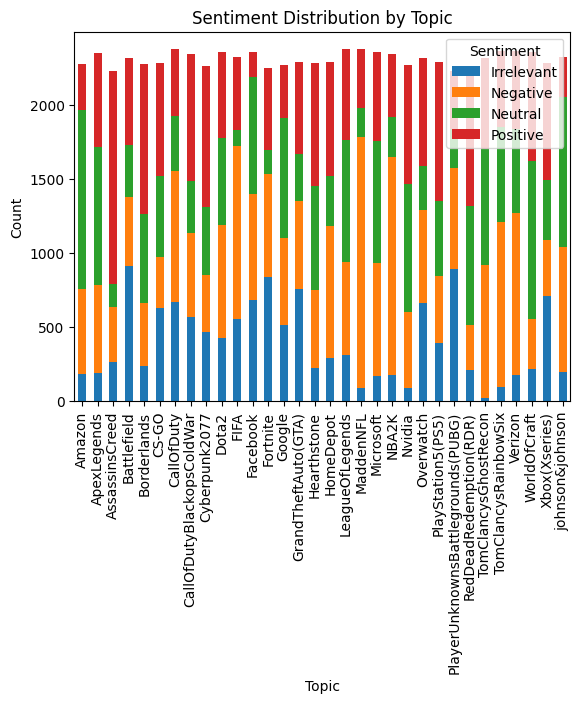

In [18]:
# Group by Topic and Sentiment, and count
sentiment_by_topic = data.groupby(['Topic', 'Sentiment']).size().unstack(fill_value=0)
print(sentiment_by_topic)

# Visualize sentiment distribution across topics
sentiment_by_topic.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution by Topic')
plt.ylabel('Count')
plt.show()


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

# Bigrams for positive sentiment
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform(data[data['Sentiment'] == 'Positive']['cleaned_text'])
bigram_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)
print(bigram_counts.head(10))  # Top 10 bigrams


twitter com        1176
pic twitter        1149
red dead            609
dead redemption     512
twitch tv           381
assassin creed      346
home depot          339
assassins creed     229
xbox series         219
black ops           206
dtype: int64
